<a href="https://colab.research.google.com/github/andretocci/LAAIA1/blob/main/FIA_Pos_DS_LAAIA1_Aula_12_S%C3%A9ries_Temporais_Modelos_Auto_Regressivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Temporais - Modelos Auto-Regressivos

[Notion: Link para anotações](https://www.notion.so/S-ries-Temporais-Modelos-Auto-Regressivos-14fad9755076491db4e72a723a807404)


**Prof. Rodrigo Mello**

## Definições

Uma série temporal é definida por um conjunto de observações, tipicamente unidimensionais, coletadas ao longo do tempo.

$X = \{x1, x2, ...,x_{n}\} $

### Por que modelamos uma série temporal?

- Compreensão da regra geradora também conhecido como processo gerador;
- Descrever o comportamento da série;
- Identificar periodicidades relevantes;
- Previsão de observações

#### Uma série temporal é composta por três elementos

**Sazonalidade**
- Presença de variações que ocorrem a específicos intervalos de tempo
- Comportamentos periódicos/repetitivos
- Geralmente regulares e que levam a padrões predizíveis

**Tendência**
- Representa uma tendência geral dos dados que crescem ou decrescem ao longo do tempo

**Heterocedasticidade**
- Hetero, do grego, diferente, e cedasticidade, dispersão
- Representa a variabilidade das observações ao longo do tempo
- Homocedasticidade → variabilidade constante ao longo do tempo

*Predição/Previsão*
-  Capacidade de, a partir de um modelo, estimar o valor de futuras observações de uma série temporal


# Propriedades de Séries Temporais

- Determinismo versus Estocasticidade
- Linearidade versus Não-Linearidade
- Estacionariedade versus NãoEstacionariedade

![](https://drive.google.com/uc?export=view&id=1eWOeHG8zC8Wyo11-i2I7ZTJlaIAgE2J_)

## Como identificar Determinismo e Estocasticidade?

### O que é Determinismo?

Toda observação da série pode ser representada apenas em função de observações passadas

$ x_t = rx_{t-1}(1-x_{t-1}) $

### O que é Estocasticidade?

Além de influências passadas, toda observação conta com influências estocásticas


$ x_t = rx_{t-1} + N(\mu, \sigma^2)  $


### Ex 1:

Exemplo é utilizado para descrever crescimentos populacionais. 

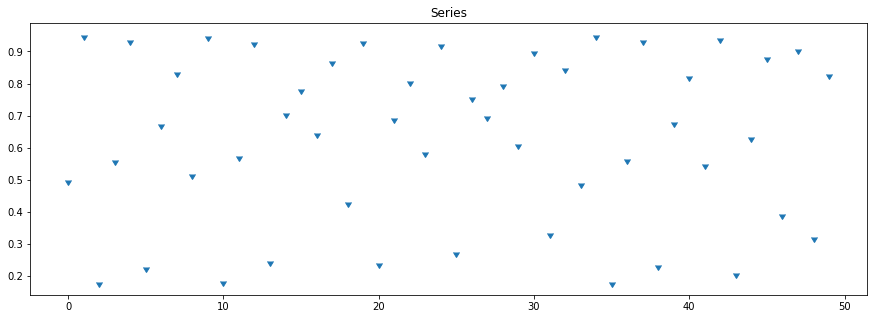

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = 3.8
xt = 0.5
series = [xt]
for i in range(0, 1000):
  if i > 0:
    value = (r*series[i -1])*(1-series[i -1])
    series.append(value)

series = np.array(series)
plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series[:50], marker=11, ls='')

##### Montando o espaço fase

Utilizamos o espaço fase para modelar nossa série.

Não é necessáriamente com apenas duas dimensões, podendo ser:

X = {x1, x2, x3, ..., x20000

(xt, xt+5, xt+10)

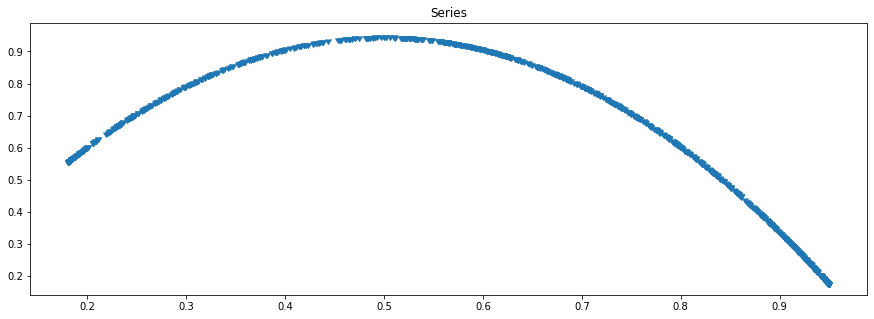

In [ ]:
series = np.array(series)
plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series[0:999], series[1:1000] , marker=11, ls='')

### Ex 2: Estocastico

Adicionamos uma variável aleatória na geração da série.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


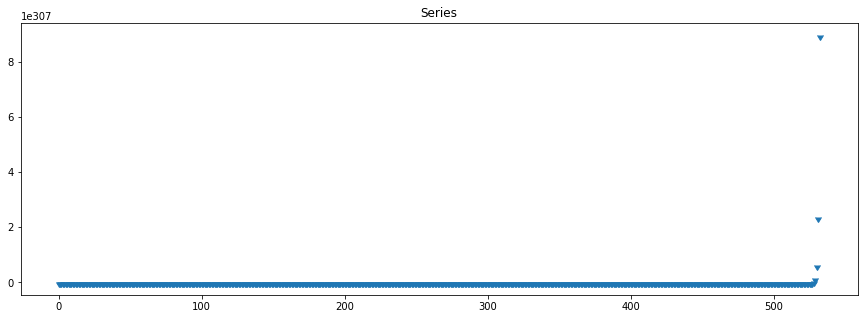

In [ ]:
r = 3.8
xt = 0.5
series = [xt]

for i in range(0, 1000):
  if i > 0:
    value = (r*series[i -1]) + np.random.normal(loc=0.0, scale=1.0, size=1)
    series.append(value)

series = np.array(series)
plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series, marker=11, ls='')

### Ex 3: Det

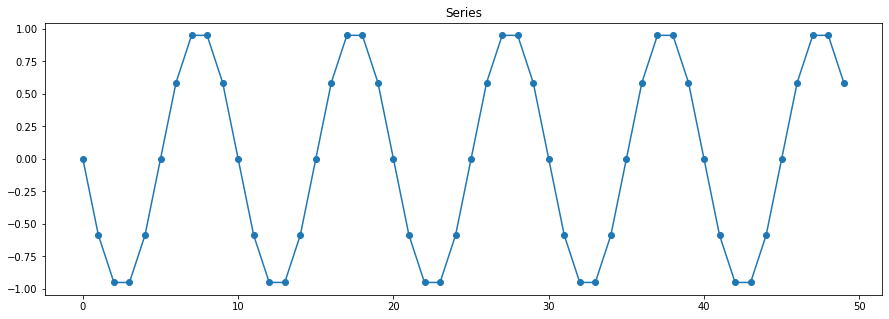

In [ ]:
time = np.array([i*0.9 for i in range(1000)])
series = np.sin(2*np.pi*time)

plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series[:50], marker="o", ls='-')

Adicionando uma variável aleatória na geração da série.

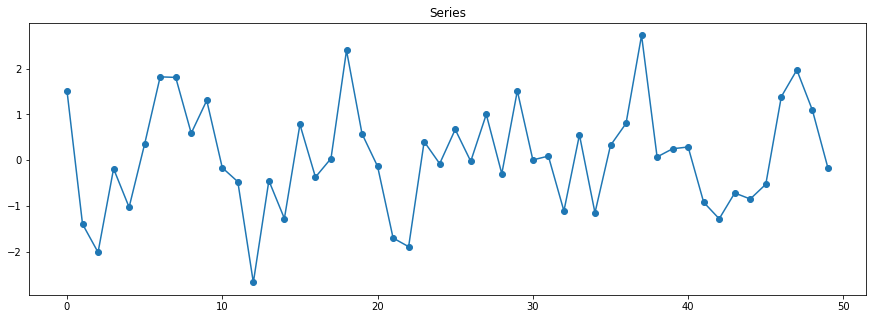

In [ ]:
time = np.array([i*0.9 for i in range(1000)])
series = np.sin(2*np.pi*time) + np.random.normal(loc=0.0, scale=1.0, size=1000)

plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series[:50], marker="o", ls='-')

### Takens' embedding theorem (Teorema de Mergulho de Takens)

Leva ao mapeamento de uma série temporal para um espaço de alta 
dimensionalidade com o objetivo de representar relações de dependência 
temporal

Seja uma série temporal:

$X = \{x1, x2, ...,x_{n}\} $

Takens' embedding theorem reconstrói a série X a fim de representar as dependências entre observações ao longo do tempo

$\Phi(x_t) = (x_{t}, x_{t+d}, x_{t+2d}, ...,x_{t+(m-1)d}) $

$m$ é o número de dimensões para que seja possível representar a série temporal.

___

*Takens, F. (1981). Detecting strange attractors in turbulence. Dynamical ystems and Turbulence, Warwick 1980, 366–381. doi:10.1007/bfb0091924*


#### Definindo Embedd

[Package ‘tseriesChaos’](https://cran.r-project.org/web/packages/tseriesChaos/tseriesChaos.pdf)

In [ ]:
def embedd(x, m, d):
  """
  x = time series
  m = embedding dimension (if lags missed)
  d = time delay (if lags missed)
  lags = vector of lags (if m and d are missed)

  # Espaço Fase
  X = {x1, x2, x3, ..., x20000

  xt| xt+5| xt+10
  --- | --- | ---
  x1| x6| x11
  x2| x7| x12

  """
  matrix = []
  for embedding_dimension in range(m):
    inicio = embedding_dimension * d
    fim = inicio - (d * (m-1))
    if fim == 0:
      fim = None
    matrix.append(x[inicio:fim])

  return matrix

#### Ex.

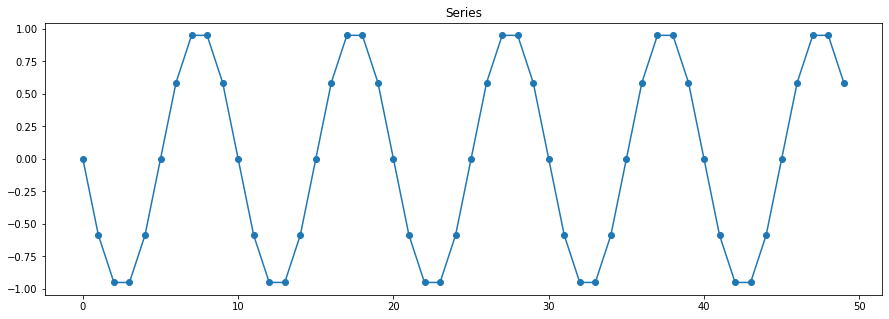

In [ ]:
time = np.array([i*0.9 for i in range(1000)])
series = np.sin(2*np.pi*time)

plt.figure(1, figsize=(15,5))
plt.title(f'Series')
plt.plot(series[:50], marker="o", ls='-')

Precisamos descobrir:

- dimensao embutida --> m
- dimensao de separação ou time lag --> d

Supondo:

- m = 2
- d = 25

(xt - 25)| xt
--- | --- 
x1| x26
x2| x27,
x3| x28

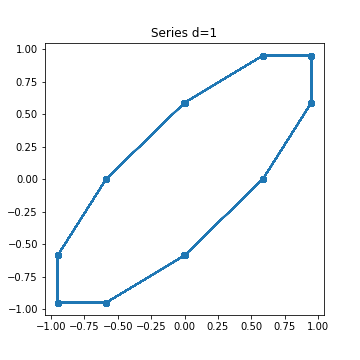

In [ ]:
import imageio
from IPython.display import Image 
#https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30

for i in range(10):
  res = embedd(series, 2, i+1)
  plt.figure(1, figsize=(5,5))
  plt.title(f'Series d={i+1}')
  plt.plot(res[0], res[1], marker="o", ls='-')
  plt.savefig(f'{i}.png')
  plt.close()

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for i in range(10):
        image = imageio.imread(f'{i}.png')
        writer.append_data(image)

Image(open('/content/mygif.gif','rb').read())

### Auto-Mutual Information

Técnica para auxiliar na estimação dos atrasos temporais entre observações de uma série temporal.

Seja uma série temporal:

$X = \{x1, x2, ...,x_{n}\} $

Calcula-se na forma:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f3385f4d779f062696c134223b5683e754a6f1c)

![img](https://www.researchgate.net/profile/Ranajoy-Bhattacharyya/publication/331399050/figure/fig2/AS:731208258433029@1551345042700/Average-mutual-information-for-USD.ppm)


Minhas anotações:
- Equação deriva do conceito de entropia e ganho de informação.
- Selecionamos o mínimo antes do aumento da incerteza como ponto de intersse.

___

*Fraser, A. M., & Swinney, H. L. (1986). Independent coordinates for strange ttractors from
mutual information. Physical Review A, 33(2), 1134–1140. doi:10.1103/physreva.3.1134*


[Problema discutido no stackoverflow](https://stackoverflow.com/questions/20491028/optimal-way-to-compute-pairwise-mutual-information-using-numpy)

[R tseries - amif: Auto Mutual Information Function](https://www.rdocumentation.org/packages/tseries/versions/0.8-4/topics/amif)

#### Pacote NoLiTSA: Exemplo

How many bins should one take while estimating the delayed mutual information?

In [ ]:
pip install git+https://github.com/manu-mannattil/nolitsa.git

  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-ysdrvr9h
  Running command git clone -q https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-ysdrvr9h
  Created wheel for nolitsa: filename=nolitsa-0.1-cp37-none-any.whl size=31133 sha256=ef0cb21af99fb81f0ac43a4b7f993104fca0f20b8922faf503efa2437e44a0c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2isl1_n/wheels/9b/2e/49/14f1c7a1b4acd6716bb946b6b40d722c4be76fd0e5b1ade611
Successfully built nolitsa


##### Time delay estimation for time series from the Henon map.
For map like data, the redundancy between components of the time delayed
vectors decrease drastically (or equivalently, the irrelevance increases
rapidly).  Best results are often obtained with a time delay of 1.
Here, we see that for data coming out of the Henon map, the delayed
mutual information curve (which does not have any local minima) gives
us a very bad estimate of the time delay.


Autocorrelation time = 1


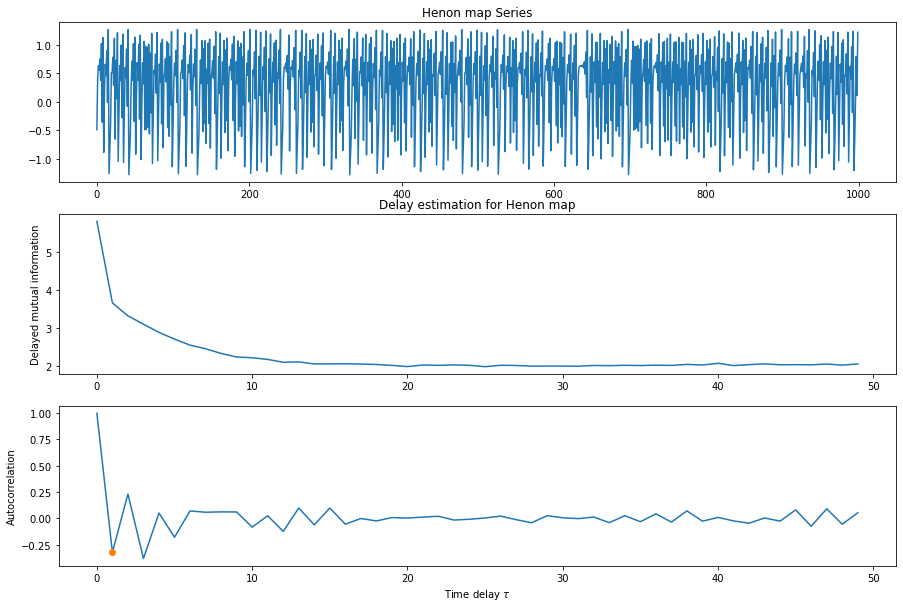

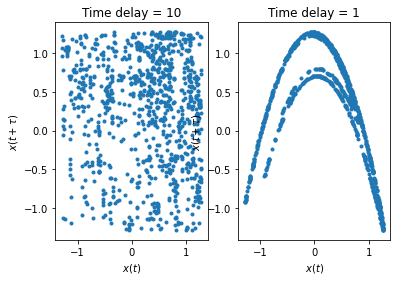

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nolitsa import data, delay

x = data.henon(length=1000)[:, 0]

# Compute autocorrelation and delayed mutual information.
lag = np.arange(50)
r = delay.acorr(x, maxtau=50)
i = delay.dmi(x, maxtau=50)

r_delay = np.argmax(r < 1.0 / np.e)
print(r'Autocorrelation time = %d' % r_delay)

plt.figure(1, figsize=(15,10))

plt.subplot(311)
plt.title(r'Henon map Series')
plt.plot(x)

plt.subplot(312)
plt.title(r'Delay estimation for Henon map')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i)

plt.subplot(313)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = 10')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-10], x[10:], '.')

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:], '.')

plt.show()
plt.tight_layout()

##### Time delay estimation for time series from the Ikeda map.
For map like data, the redundancy between components of the time delayed
vectors decrease drastically (or equivalently, the irrelevance increases
rapidly).  Best results are often obtained with a time delay of 1.
Here, we see that for data coming out of the Ikeda map, the delayed
mutual information curve (which does not have any local minima) gives
us a very bad estimate of the time delay.

Autocorrelation time = 1


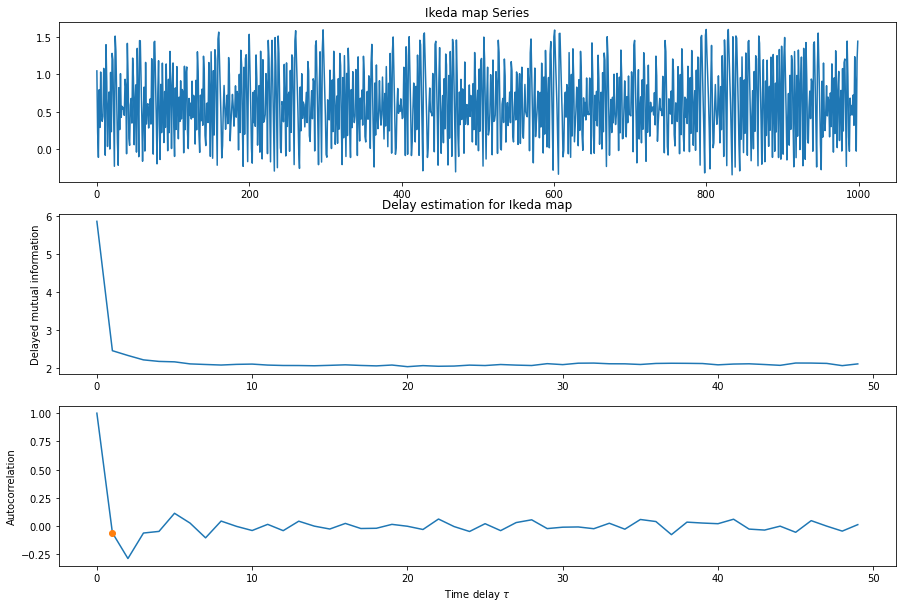

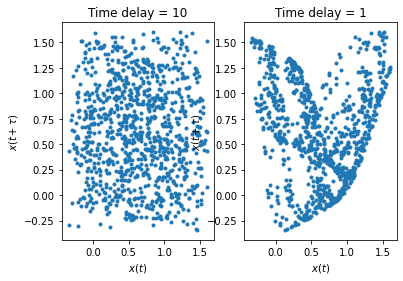

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nolitsa import data, delay

x = data.ikeda(length=1000)[:, 0]

# Compute autocorrelation and delayed mutual information.
lag = np.arange(50)
r = delay.acorr(x, maxtau=50)
i = delay.dmi(x, maxtau=50)

r_delay = np.argmax(r < 1.0 / np.e)
print(r'Autocorrelation time = %d' % r_delay)

plt.figure(1, figsize=(15,10))

plt.subplot(311)
plt.title(r'Ikeda map Series')
plt.plot(x)

plt.subplot(312)
plt.title(r'Delay estimation for Ikeda map')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i)

plt.subplot(313)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = 10')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-10], x[10:], '.')

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:], '.')

plt.show()

##### Time delay estimation for time series from the Rössler oscillator.
The first minimum of the delayed mutual information occurs at 14 and the
autocorrelation time is 11.  Note that both these values depend on the
sampling time used and should not be taken as "universal" time delays
for reconstructing the Rössler oscillator.

Minima of delayed mutual information = [ 14  42  73  85  90 103 134 164 192 219]
Autocorrelation time = 11


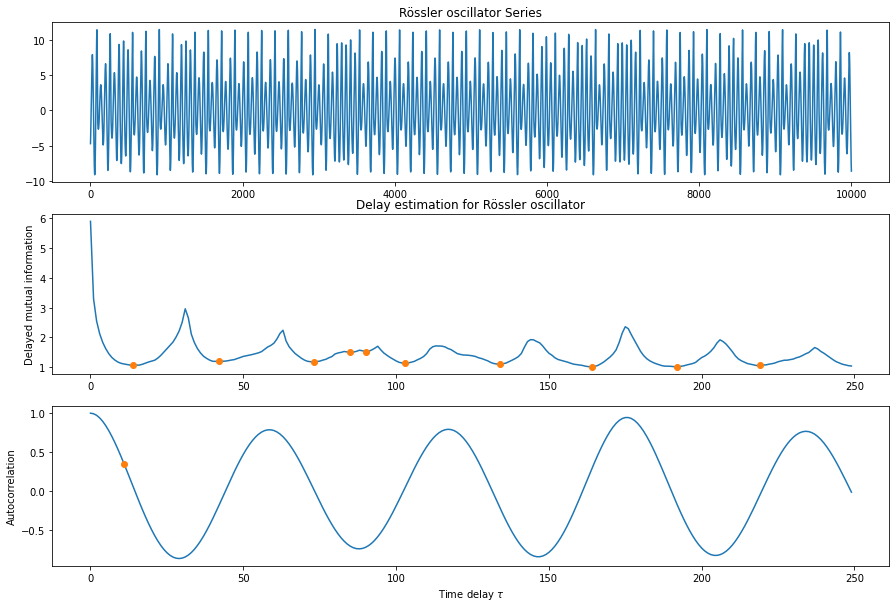

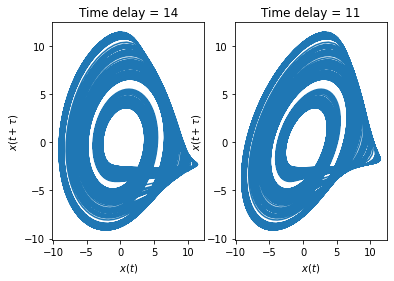

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nolitsa import data, delay, noise


def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1


x = data.roessler()[1][:, 0]

# Compute autocorrelation and delayed mutual information.
lag = np.arange(250)
r = delay.acorr(x, maxtau=250)
i = delay.dmi(x, maxtau=250)

# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)

print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)

plt.figure(1, figsize=(15,10))

plt.subplot(311)
plt.title(r'Rössler oscillator Series')
plt.plot(x)

plt.subplot(312)
plt.title(r'Delay estimation for Rössler oscillator')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')

plt.subplot(313)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-i_delay[0]], x[i_delay[0]:])

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:])

plt.show()

##### Time delay estimation for time series from the Lorenz attractor.
The first minimum of the delayed mutual information occurs at 5 and the
autocorrelation time is 11.  A better choice is provided by the mutual
information curve.  If one plots the 2D phase portrait of the attractor
with a delay of 11, one can see that it's overfolded.  Note that both
these values depend on the sampling time used and should not be taken as
"universal" time delays for reconstructing the Lorenz attractor.

Minima of delayed mutual information = [ 5 17 29 39 51 61 71 80 85 92]
Autocorrelation time = 15


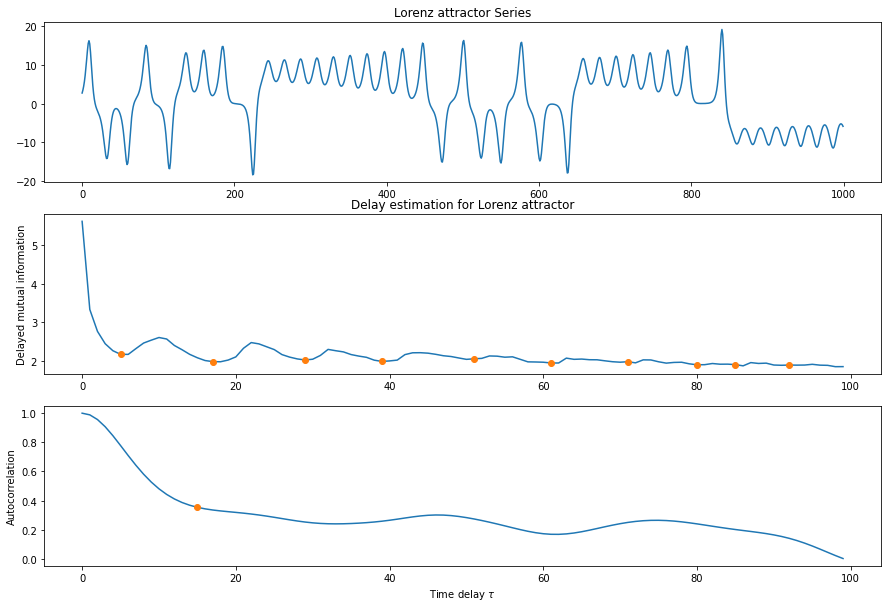

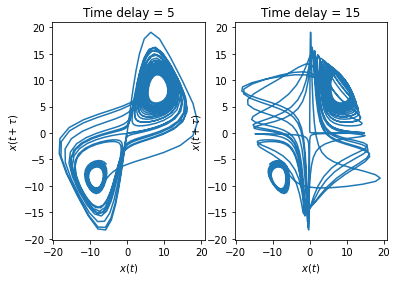

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nolitsa import data, delay, noise


def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1


x = data.lorenz(1000)[1][:, 0]

# Compute autocorrelation and delayed mutual information.
lag = np.arange(100)
r = delay.acorr(x, maxtau=100)
i = delay.dmi(x, maxtau=100)

# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)

print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)


plt.figure(1, figsize=(15,10))

plt.subplot(311)
plt.title(r'Lorenz attractor Series')
plt.plot(x)

plt.subplot(312)
plt.title(r'Delay estimation for Lorenz attractor')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')

plt.subplot(313)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-i_delay[0]], x[i_delay[0]:])

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:])

plt.show()

### False-Nearest Neighbors

- Mede a distância de um ponto no espaço para seu r-ésimo vizinho
- Visa aumentar o número de dimensões de d para d+1 a fim de desdobrar todos os comportamentos

![](https://www.pks.mpg.de/tisean/Tisean_3.0.1/docs/chaospaper/img29.gif)

___

[False nearest neighbors](https://www.pks.mpg.de/tisean/Tisean_3.0.1/docs/chaospaper/node9.html)


##### FNN for time series from the Henon map.
As expected, the FNN fraction goes to zero at an embedding dimension
equal to 2.

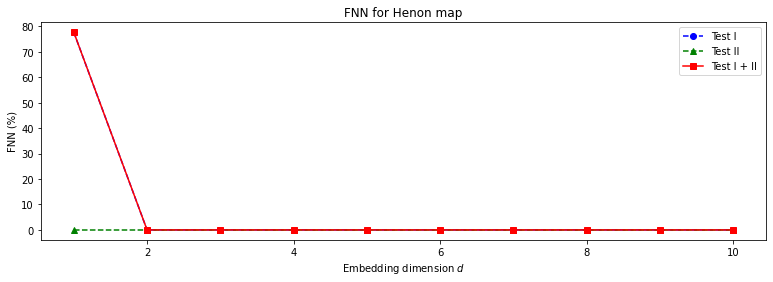

In [ ]:
from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.henon(length=5000)[:, 0]

dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(x, tau=1, dim=dim, window=10, metric='cityblock')

plt.figure(1, figsize=(13,4))
plt.title(r'FNN for Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

plt.show()

#### FNN for time series from the Ikeda map.
This is a purely deterministic time series, yet we see the second test
reporting FNNs at large embedding dimensions.  The whole problem is that
the fraction of FNN strongly depends on the threshold parameters
used (apart from the metric).


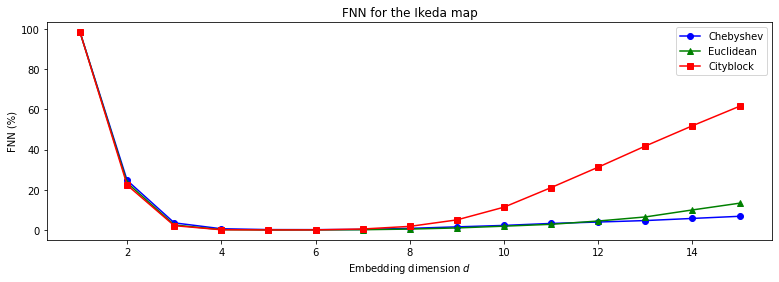

In [ ]:
from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.ikeda(length=5000)[:, 0]
dim = np.arange(1, 15 + 1)

f1 = dimension.fnn(x, tau=1, dim=dim, window=0, metric='chebyshev')[2]
f2 = dimension.fnn(x, tau=1, dim=dim, window=0, metric='euclidean')[2]
f3 = dimension.fnn(x, tau=1, dim=dim, window=0, metric='cityblock')[2]

plt.figure(1, figsize=(13,4))
plt.title(r'FNN for the Ikeda map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo-', label=r'Chebyshev')
plt.plot(dim, 100 * f2, 'g^-', label=r'Euclidean')
plt.plot(dim, 100 * f3, 'rs-', label=r'Cityblock')
plt.legend()

plt.show()

#### FNN for time series from the Mackey-Glass equation.
The embedding dimension reported is around 4-5.  But the second test
reports FNNs at larger d's.  Should we trust our results in such a case?

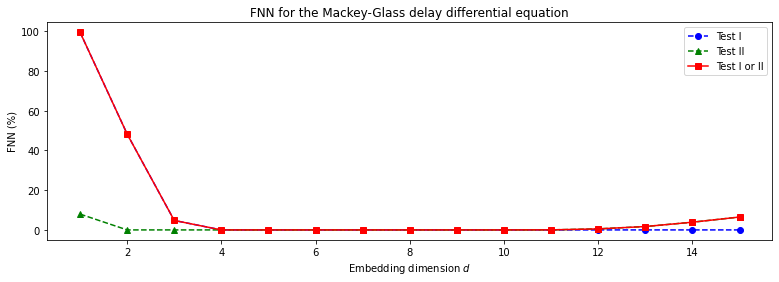

In [ ]:
from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.mackey_glass(tau=23.0, sample=0.46, n=1000)

# Since we're resampling the time series using a sampling step of
# 0.46, the time delay required is 23.0/0.46 = 50.
tau = 50
dim = np.arange(1, 15 + 1)
f1, f2, f3 = dimension.fnn(x, tau=50, dim=dim, window=100, metric='euclidean')

plt.figure(1, figsize=(13,4))
plt.title(r'FNN for the Mackey-Glass delay differential equation')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

### Recurrence Plot

Com base no espaço fase, calcula a proximidade entre estados, o que significa que trajetórias distintas permanecem vizinhas ao longo do tempo.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b5c527fe3796f40363349862e6876e1c57f70c47)

![](https://ars.els-cdn.com/content/image/1-s2.0-S0370157306004066-gr12.jpg) 


![](https://upload.wikimedia.org/wikipedia/commons/4/46/Rp_examples740.gif)

### Recurrence Quantification Analysis

- Provê medidas para quantificar elementos à partir de RPs

**Importante Habilitat GPU em Editar > Confg do notebook > GPU!!!**

- [pypi: PyRQA ](https://pypi.org/project/PyRQA/#opencl-setup)
- [github: PyRQA ](https://github.com/szhan/pyrqa)

In [ ]:
!pip install PyRQA

In [ ]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
data_points = [0.1, 0.5, 1.3, 0.7, 0.8, 1.4, 1.6, 1.2, 0.4, 1.1, 0.8, 0.2, 1.3]
time_series = TimeSeries(data_points,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_length = 2
print(result)

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.371901
Determinism (DET): 0.411765
Average diagonal line length (L): 2.333333
Longest diagonal line length (L_max): 3
Divergence (DIV): 0.333333
Entropy diagonal lines (L_entr): 0.636514
Laminarity (LAM): 0.400000
Trapping time (TT): 2.571429
Longest vertical line length (V_max): 4
Entropy vertical lines (V_entr): 0.955700
Average white vertical line length (W): 2.538462
Longest white vertical line length (W_max): 6
Longest white vertical line length inverse (W_div): 0.166667
Entropy white vertical lines (W_entr): 0.839796

Ratio determinism / recurrence rate (DET/RR): 1.107190
Ratio laminarity / determinism (LAM/DET): 0.971429



## Por que descobrir a natureza linear ou não-linear de minha série temporal?

Somos capazes de escolher as melhores estratégias de modelagem, o que melhora significativamente a representação dos dados e predições.





### Como avaliar a linearidade ou não linearidade?

**White Neural Network**

- Permite testar se uma série temporal é predominantemente linear ou não linear
- Funciona como uma Rede Neural Artificial Multilayer Perceptron em que medimos os resíduos ao final;
  - Se os resíduos forem significativamente reduzidos ou removidos, então a série é não linear. Caso contrário, ela é tida como linear;
  - Hipóteses: 
    - Nula: a série temporal é linear
    - Alternativa: a série temporal é não linear

*Lee, T.-H., White, H., & Granger, C. W. J. (1993). Testing for neglected nonlinearity in time series models. Journal of Econometrics, 56(3), 269–290. doi:10.1016/0304-4076(93)90122-l*

## Como identificar Estacionariedade e Não-Estacionariedade?

###  O que é Estacionaridade?

Média e variância (e demais momentos estatísticos) de uma série temporal
não mudam ao longo do tempo

### O que é Não-Estacionaridade?

Tais propriedades variam ao longo do tempo

### Qual o benefício em descobrir a natureza estacionária ou não estacionária de minha série temporal?

Podemos escolher modelos mais adequados para representar nossa série temporal, melhorando sua representação e predição 

### Como avaliar a estacionariedade ou não-estacionariedade?



#### Dickey-Fuller Test

Reconstrói uma série temporal com tipicamente um atraso
e duas dimensões para verificar dispersão

```
> x <- arima.sim(list(order = c(1,1,0), ar = 0.7), n = 1000)
> y <- arima.sim(list(order = c(1,0,0), ar = 0.7), n = 1000)
> plot(tseriesChaos::embedd(x,m=2,d=1))
> plot(tseriesChaos::embedd(y,m=2,d=1))
```

#### Augmented Dickey-Fuller Test

Reconstrói uma série temporal com diversos atrasos para verificar dispersão.

H0: Série é estácionária.
H1:Série não é estácionária.

https://machinelearningmastery.com/time-series-data-stationary-python/


In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

y = np.linspace(0, 10, 1000)
x = np.sin(x)
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -145.047756
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Definindo Funções 

## Função: det_est

Função que compila conteúdos apresentados anteriormente e classifica uma série temporal em:

- Determinismo versus Estocasticidade
- Linearidade versus Não-Linearidade
- Estacionariedade versus NãoEstacionariedade

In [ ]:
# Deterministica ou Estocástica
from nolitsa import delay

def det_est(series):
  """
  Tentar uma reconstrução do espaço-fase
   X = [x1, x2, x3, ..., xn]
   X = [35, 34, ..., 12, 11,..., 37]

  Teorema Takens: 
   [x1, x1+d, x1+2d, ..., x1+(m-1)d]
           d = time lag (Fraser & Swinney)
           m = dimensão de embutir
   No R
     mutual(series, lag.max=floor(length(series)/2)))
  """
  print('Calculando a informacao mutua para estimar o time lag...')
  mt = delay.dmi(series, maxtau=int(np.floor(len(series)/2)))

  #(Fraser & Swinney)
  # d = time lag 
  d = (np.diff(np.sign(np.diff(mt))) > 0).nonzero()[0] + 1 #Busca o mínimo local
  d = d[0] #Seleciona o primeiro minimo
  print(f'Time lag: {d}')

  # false nearest neighbors para calcular o m, dimensão de embutir.
  print('Calculando o numero de eixos do espaco fase...')
  fnn = dimension.fnn(x, tau=d, dim=dim, window=10, metric='euclidean')[2]
  m = ((fnn < 0.2).nonzero()[0] + 1)[0]
  print(f'Dimensões necessárias para previsão, m={m}')

  # Ex. m=3, d=5
  ## X = [35, 34, ..., 12, 11,..., 37]
  ## xt - 10, xt-5, xt
  ## Tendo 2 dimensões atrás, consigo prever o meu xt
  ## 

  
  print('Reconstruindo o espaco fase...')

  

  return mt

# Estocástica -> Linear ou Não Linear

# Linear -> Estacionária ou Não Estacionária

## Embedd

In [ ]:
def embedd(x, m, d):
  """
  x = time series
  m = embedding dimension (if lags missed)
  d = time delay (if lags missed)
  lags = vector of lags (if m and d are missed)

  # Espaço Fase
  X = {x1, x2, x3, ..., x20000

  xt| xt+5| xt+10
  --- | --- | ---
  x1| x6| x11
  x2| x7| x12

  """
  matrix = []
  for embedding_dimension in range(m):
    inicio = embedding_dimension * d
    fim = inicio - (d * (m-1))
    if fim == 0:
      fim = None
    matrix.append(x[inicio:fim])

  return matrix

# Referencias

- **NoLiTSA**: *NoLiTSA (NonLinear Time Series Analysis) is a Python module implementing several standard algorithms used in nonlinear time series analysis.*
[Github](https://github.com/manu-mannattil/nolitsa/tree/master/examples)

- [Markdown Mathematic](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/)

# Exercícios

Considere as séries temporais que temos acesso (Dólar, IBOV, 
AZUL4, PETR4, IRBR3, NOAA Paris, Lorenz), verifique se elas são:

- Determinísticas ou estocásticas
- Lineares ou Não-Lineares
- Estacionárias ou Não-Estacionárias

## Imports

In [ ]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

!pip install git+https://github.com/manu-mannattil/nolitsa.git

  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-1tp3kfg1
  Running command git clone -q https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-1tp3kfg1
  Created wheel for nolitsa: filename=nolitsa-0.1-cp37-none-any.whl size=31133 sha256=a819dc59825988a783c6e994cc8a1638bc60a7e80ac38f05ba62c598f6ea7813
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpoj1f76/wheels/9b/2e/49/14f1c7a1b4acd6716bb946b6b40d722c4be76fd0e5b1ade611
Successfully built nolitsa


## Funções

### dmi 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nolitsa import delay

def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

def ddi_plot(series, maxtau=None, seriestitle=None):
  """
  time-delayed mutual information plot analysis

  Return:
  i_dalay
  """
  if maxtau is None:
    maxtau = int(np.floor(len(series)/2))

  x = series

  # Compute autocorrelation and delayed mutual information.
  lag = np.arange(maxtau)
  r = delay.acorr(x, maxtau=maxtau)
  i = delay.dmi(x, maxtau=maxtau)

  i_dalay = localmin(i)[0]
  print(f'Local Min:{i_dalay}')

  r_delay = np.argmax(r < 1.0 / np.e)
  print(r'Autocorrelation time = %d' % r_delay)
  
  if seriestitle is None:
    seriestitle = ''
  else:
    seriestitle = ' - ' + seriestitle

  plt.figure(1, figsize=(15,10))

  plt.subplot(311)
  plt.title(f'Series{seriestitle}')
  plt.plot(x)

  plt.subplot(312)
  plt.title(r'Delay estimation')
  plt.ylabel(r'Delayed mutual information')
  plt.plot(lag, i)
  plt.axvline(i_dalay, ls= '--')

  plt.subplot(313)
  plt.xlabel(r'Time delay $\tau$')
  plt.ylabel(r'Autocorrelation')
  plt.plot(lag, r, r_delay, r[r_delay], 'o')

  plt.figure(2, figsize=(15,5))
  plt.subplot(121)
  plt.title(r'Time delay = 10')
  plt.xlabel(r'$x(t)$')
  plt.ylabel(r'$x(t + \tau)$')
  plt.plot(x[:-10], x[10:], '.')

  plt.subplot(122)
  plt.title(r'Time delay = %d' % i_dalay)
  plt.xlabel(r'$x(t)$')
  plt.ylabel(r'$x(t + \tau)$')
  plt.plot(x[:-i_dalay], x[i_dalay:], '.')

  plt.show()
  plt.tight_layout()

  return i_dalay

### FNN

In [ ]:
from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np


def fnn_plot(x, tau, m=20, seriestitle=None):
  """
  """
  if seriestitle is None:
    seriestitle = ''
  else:
    seriestitle = ' - ' + seriestitle

  dim = np.arange(1, m + 1)
  f1, f2, f3 = dimension.fnn(x, tau=tau, dim=dim, window=10)

  plt.figure(1, figsize=(13,4))
  plt.title(f'FNN for {seriestitle}')
  plt.xlabel(r'Embedding dimension $d$')
  plt.ylabel(r'FNN (%)')
  plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
  plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
  plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
  plt.legend()

  plt.show()
  m = ((f3 < 0.2).nonzero()[0] + 1)
  print(f'Dimensões necessárias para previsão, m={m}')

  return m[0]

Local Min:184
Autocorrelation time = 0


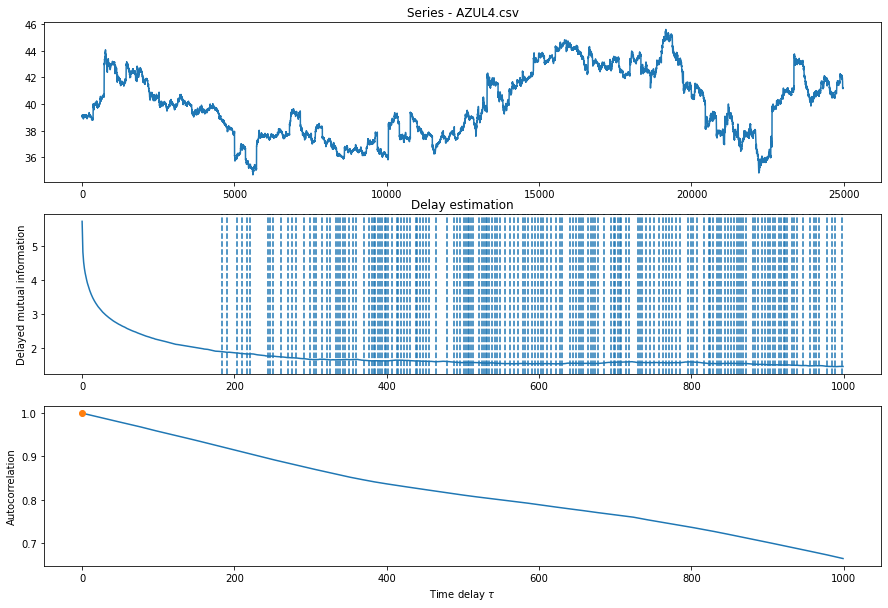

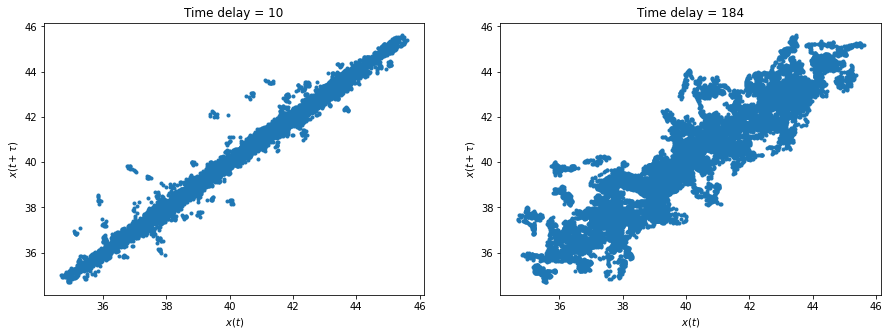

<Figure size 432x288 with 0 Axes>

In [ ]:
ddi_plot(dfs[table_name][colname_y],maxtau = 1000, seriestitle = table_name)

In [ ]:
# ddi_plot(dfs[table_name][colname_y], table_name)

x = dfs[table_name][colname_y]
i = delay.dmi(x, maxtau=50)
localmin(i)

array([], dtype=int64)

## Leitura dos datasets

In [ ]:
#Buscando arquivos
path = "/content/drive/MyDrive/Cursos/FIA_Pos_DS-LAAIA1/Analytics II/12. Séries Temporais/dados/"
datasets = glob.glob(path + '*.csv')
dfs = {}
plot_param = []
for i in datasets:
  name = i.replace(path, '')
  dfs[name] = pd.read_csv(i)
  print(name)

AZUL4.csv
IBOV.csv
Paris_Le_Bouget.csv
PETR4.csv
DOLAR.csv
IRBR3.csv


### DataSet: AZUL4

In [ ]:
table_name = list(dfs.keys())[0]
print(table_name)
colname_x = 'datetime'
colname_y = 'vwap'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

AZUL4.csv


,datetime,asset,low,high,open,close,volume_a,volume_v,volume_l,volume_i,vwap
0,1606834500000,AZUL4,39.01,39.05,39.03,39.04,2600,1400,0,0,39.0345
1,1606834560000,AZUL4,39.04,39.11,39.04,39.07,53100,8500,0,0,39.0738
2,1606834620000,AZUL4,39.08,39.13,39.09,39.13,12800,5000,0,0,39.1091
3,1606834680000,AZUL4,39.11,39.14,39.13,39.14,3200,3300,0,0,39.1263
4,1606834740000,AZUL4,39.10,39.20,39.15,39.13,37000,5600,0,0,39.1517


#### Auto Mutual Information

Local Min:184
Autocorrelation time = 2062


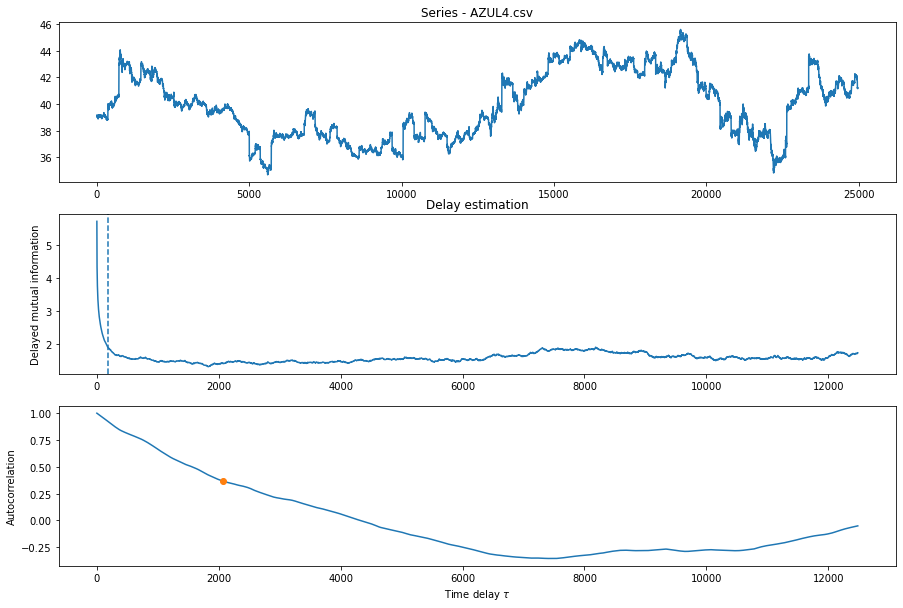

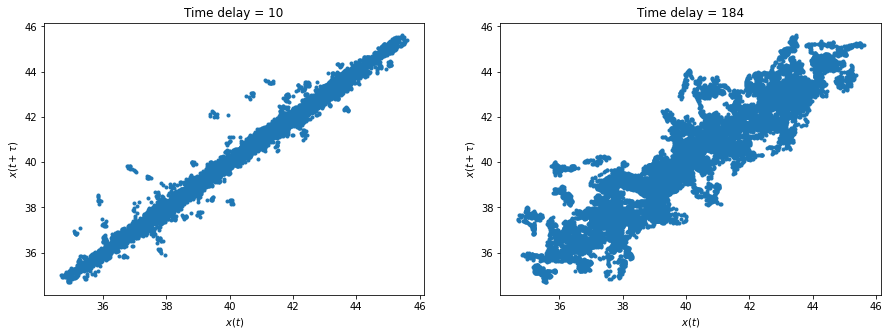

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y]
d = ddi_plot(series, maxtau = None, seriestitle = table_name)

#### FNN

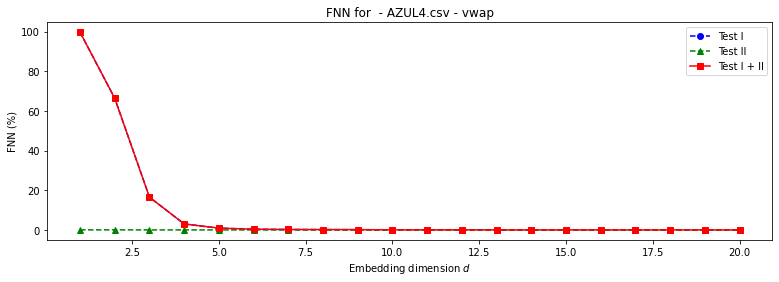

Dimensões necessárias para previsão, m=[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


3

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

### DataSet: IBOV

In [ ]:
table_name = list(dfs.keys())[1]
print(table_name)
colname_x = 'datetime'
colname_y = 'vwap'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

IBOV.csv


,datetime,asset,low,high,open,close,volume_a,volume_v,volume_l,volume_i,vwap
0,1606834500000,INDZ20,110765.0,110825.0,110790.0,110795.0,145,70,0,0,110801.6279
1,1606834560000,INDZ20,110825.0,110890.0,110825.0,110850.0,180,100,0,0,110859.9107
2,1606834620000,INDZ20,110860.0,110910.0,110865.0,110895.0,65,40,0,0,110889.7619
3,1606834680000,INDZ20,110840.0,110955.0,110885.0,110950.0,315,80,0,0,110896.6456
4,1606834740000,INDZ20,110885.0,110970.0,110960.0,110970.0,85,135,0,0,110932.2727


#### Auto Mutual Information

Local Min:147
Autocorrelation time = 2742


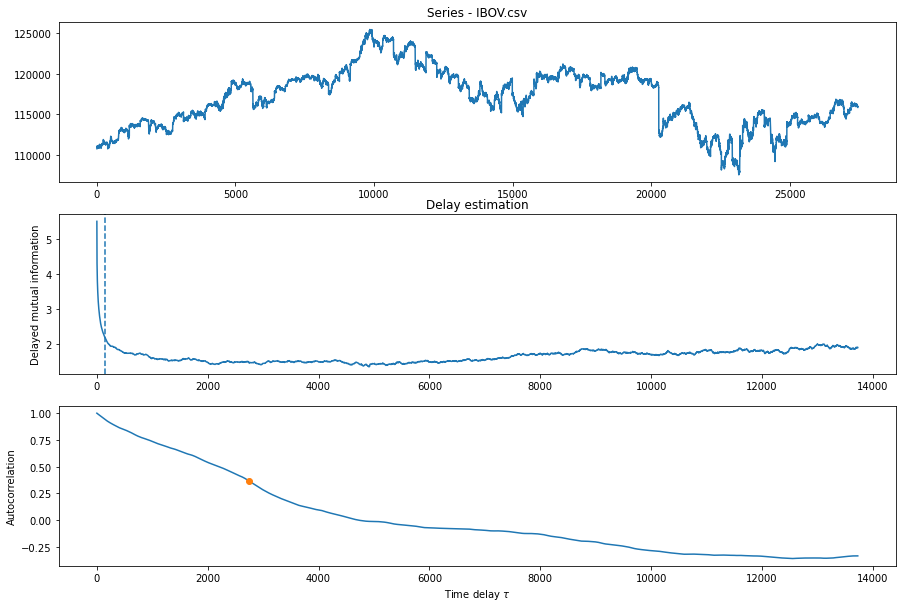

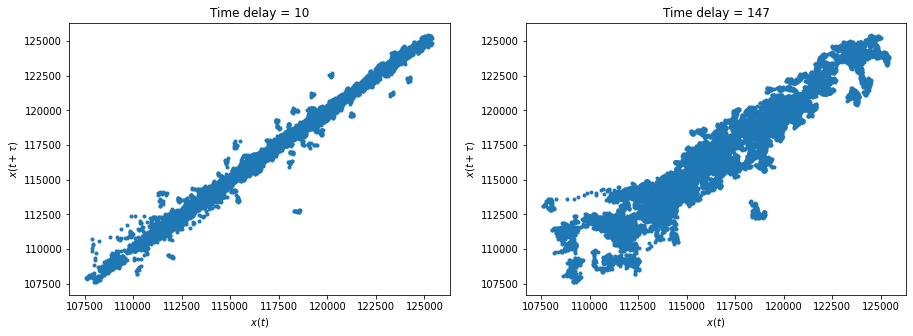

147

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y]
ddi_plot(series, maxtau = None, seriestitle = table_name)

#### FNN

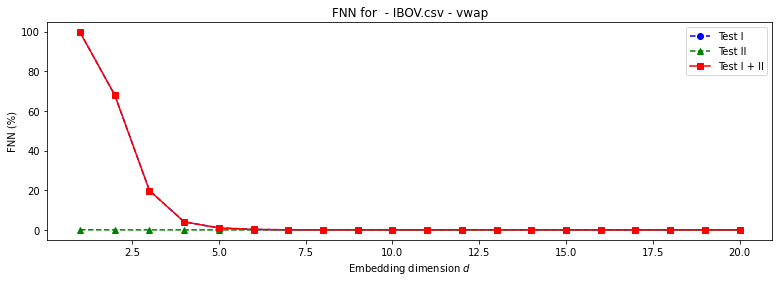

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

### DataSet: Paris_Le_Bouget PRCP



In [ ]:
table_name = list(dfs.keys())[2]
print(table_name)
colname_x = 'DATE'
colname_y = 'PRCP'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

Paris_Le_Bouget.csv


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-01,0.0,NaN,NaN,10.1,4.5
1,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-02,7.5,NaN,NaN,12.0,7.9
2,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-03,2.2,NaN,NaN,9.3,6.0
3,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-04,3.1,NaN,NaN,8.3,6.0
4,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-05,0.0,NaN,NaN,6.0,2.2


#### Auto Mutual Information

Local Min:10
Autocorrelation time = 1


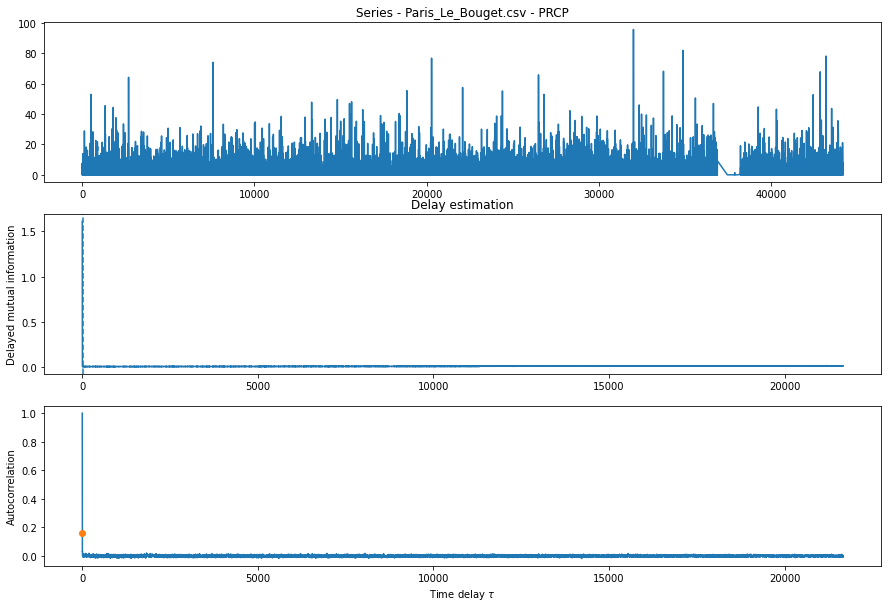

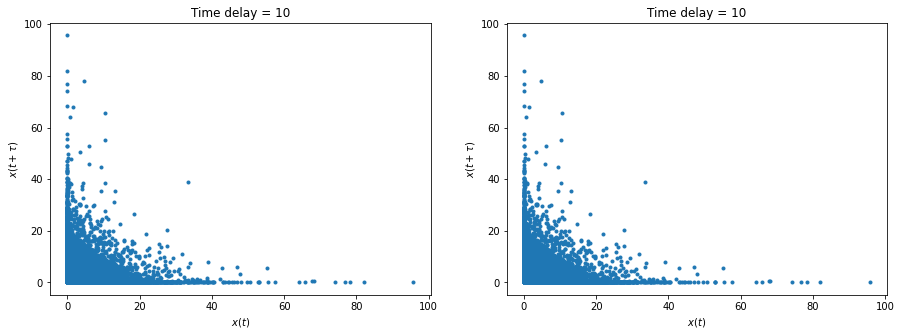

10

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y][~dfs[table_name][colname_y].isna()]

ddi_plot(series,maxtau = None, seriestitle = table_name + ' - ' + colname_y)

#### FNN

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

### DataSet: Paris_Le_Bouget TMAX

In [ ]:
table_name = list(dfs.keys())[2]
colname_x = 'DATE'
colname_y = 'TMAX'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-01,0.0,NaN,NaN,10.1,4.5
1,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-02,7.5,NaN,NaN,12.0,7.9
2,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-03,2.2,NaN,NaN,9.3,6.0
3,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-04,3.1,NaN,NaN,8.3,6.0
4,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,1900-01-05,0.0,NaN,NaN,6.0,2.2


#### Auto Mutual Information

Local Min:77
Autocorrelation time = 67


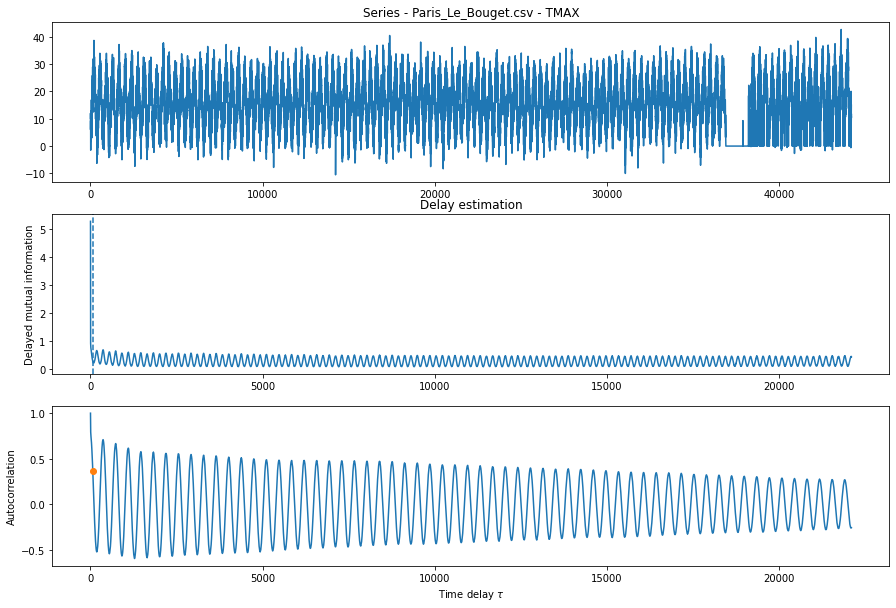

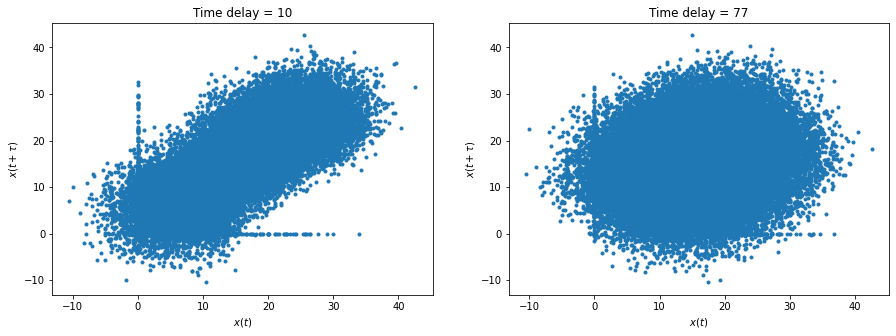

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y].fillna(0)

d = ddi_plot(series,maxtau = None, seriestitle = table_name + ' - ' + colname_y)

#### FNN

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

Exception: ignored

### DataSet: PETR4

In [ ]:
table_name = list(dfs.keys())[3]
colname_x = 'datetime'
colname_y = 'vwap'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

,datetime,asset,low,high,open,close,volume_a,volume_v,volume_l,volume_i,vwap
0,1606834500000,PETR4,25.46,25.52,25.49,25.52,57400,17800,0,0,25.4922
1,1606834560000,PETR4,25.50,25.54,25.51,25.53,48300,8700,0,0,25.5258
2,1606834620000,PETR4,25.52,25.56,25.53,25.56,102000,9800,0,0,25.5432
3,1606834680000,PETR4,25.53,25.57,25.56,25.55,55800,44000,0,0,25.5471
4,1606834740000,PETR4,25.54,25.57,25.57,25.56,6100,49400,0,0,25.5470


#### Auto Mutual Information

Local Min:190
Autocorrelation time = 3152


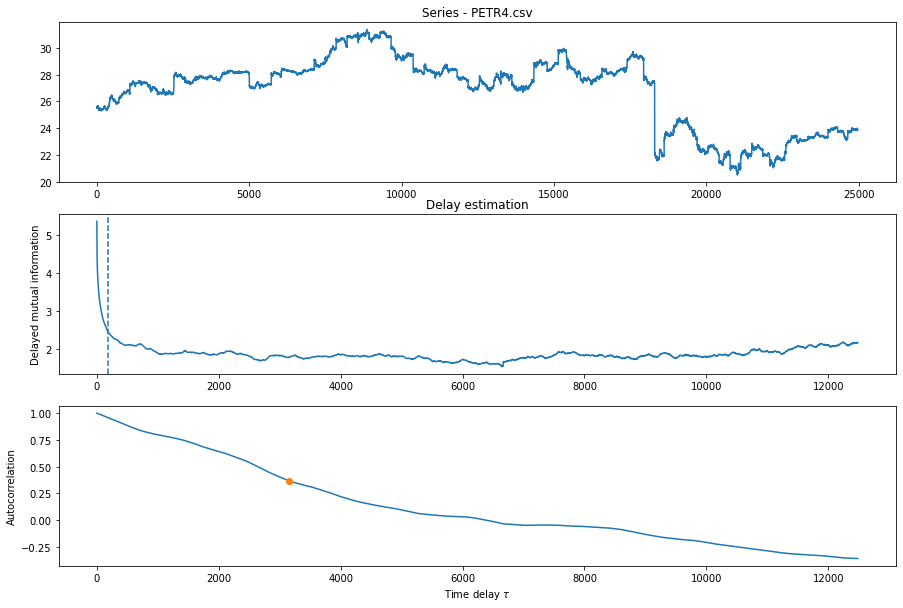

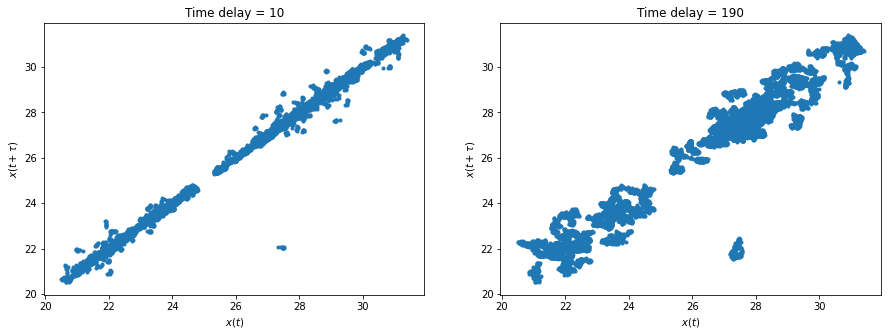

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y]
d = ddi_plot(series, maxtau = None, seriestitle = table_name)

#### FNN

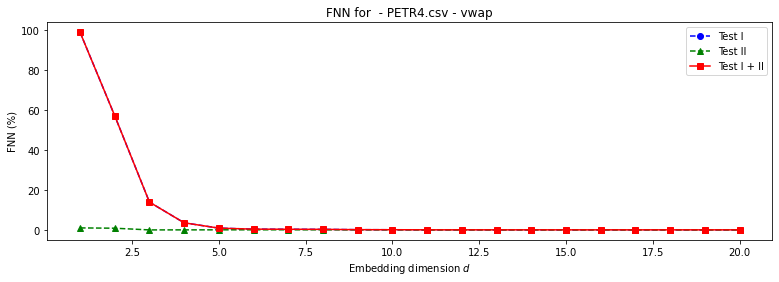

Dimensões necessárias para previsão, m=[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


3

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

### DataSet: DOLAR

In [ ]:
table_name = list(dfs.keys())[4]
print(table_name)
colname_x = 'datetime'
colname_y = 'vwap'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

DOLAR.csv


,datetime,asset,low,high,open,close,volume_a,volume_v,volume_l,volume_i,vwap
0,1606834500000,WINZ20,110755.0,110825.0,110790.0,110795.0,8517,9765,0,9201,110795.0708
1,1606834560000,WINZ20,110795.0,110890.0,110795.0,110855.0,22258,11947,0,11921,110852.6686
2,1606834620000,WINZ20,110850.0,110920.0,110850.0,110895.0,9549,7684,0,8089,110888.5629
3,1606834680000,WINZ20,110835.0,110955.0,110895.0,110945.0,13839,10601,0,9378,110888.6077
4,1606834740000,WINZ20,110880.0,110980.0,110945.0,110980.0,9842,8835,0,10031,110938.9550


#### Auto Mutual Information

Local Min:129
Autocorrelation time = 2753


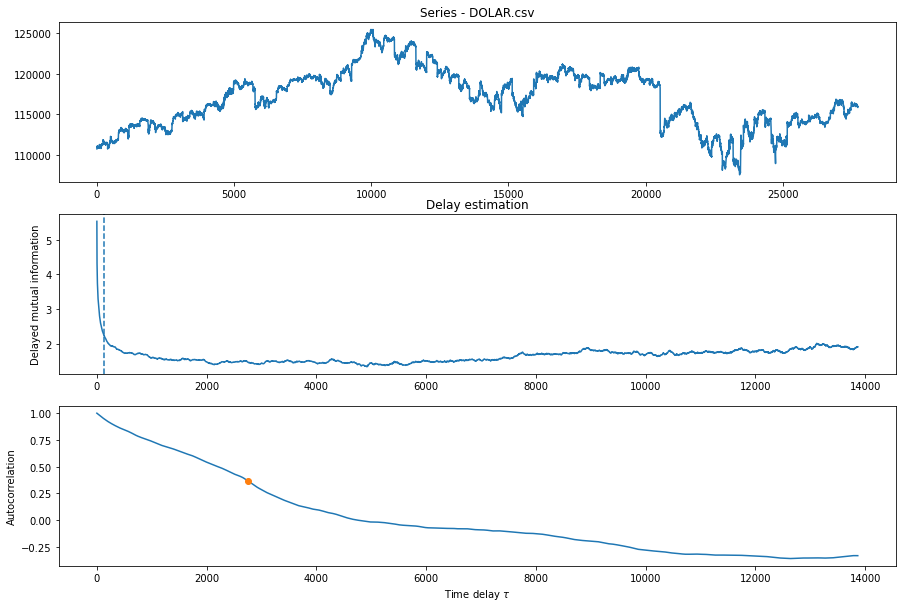

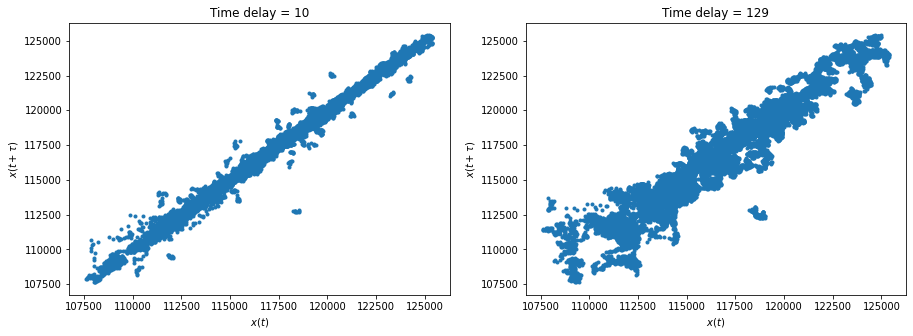

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y]
d = ddi_plot(series, maxtau = None, seriestitle = table_name)

#### FNN

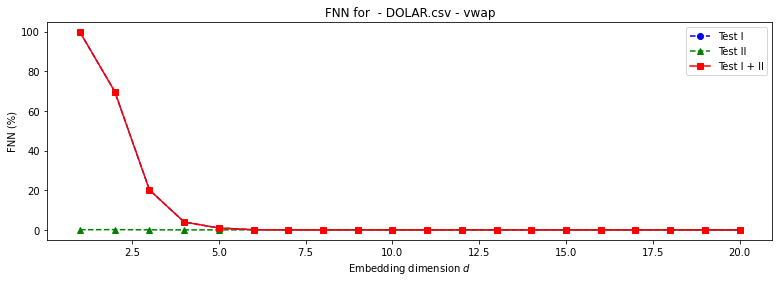

Dimensões necessárias para previsão, m=[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


4

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

### DataSet: IRBR3

In [ ]:
table_name = list(dfs.keys())[5]
print(table_name)
colname_x = 'datetime'
colname_y = 'vwap'
plot_param.append((table_name, colname_x, colname_y ))
dfs[table_name].head()

IRBR3.csv


,datetime,asset,low,high,open,close,volume_a,volume_v,volume_l,volume_i,vwap
0,1606834500000,IRBR3,6.72,6.73,6.73,6.73,1200,4100,0,0,6.7223
1,1606834560000,IRBR3,6.72,6.73,6.73,6.73,1700,3000,0,0,6.7236
2,1606834620000,IRBR3,6.72,6.73,6.73,6.73,3600,1800,0,0,6.7267
3,1606834680000,IRBR3,6.72,6.73,6.73,6.72,2300,138300,0,0,6.7202
4,1606834740000,IRBR3,6.71,6.72,6.72,6.72,31600,4400,0,0,6.7188


#### Auto Mutual Information

Local Min:144
Autocorrelation time = 4724


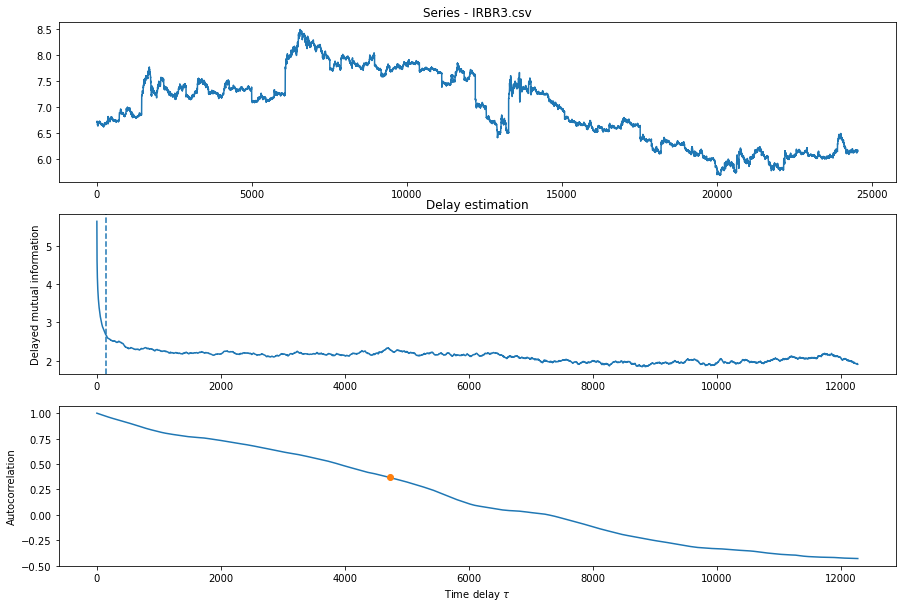

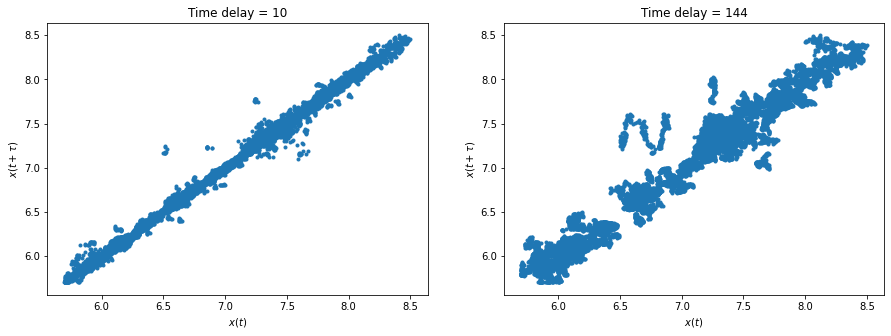

<Figure size 432x288 with 0 Axes>

In [ ]:
series = dfs[table_name][colname_y]
d = ddi_plot(series, maxtau = None, seriestitle = table_name)

#### FNN

In [ ]:
fnn_plot(x = series, tau = d, m=20, seriestitle= table_name + ' - ' + colname_y)

## Visualizando a Série Temporal

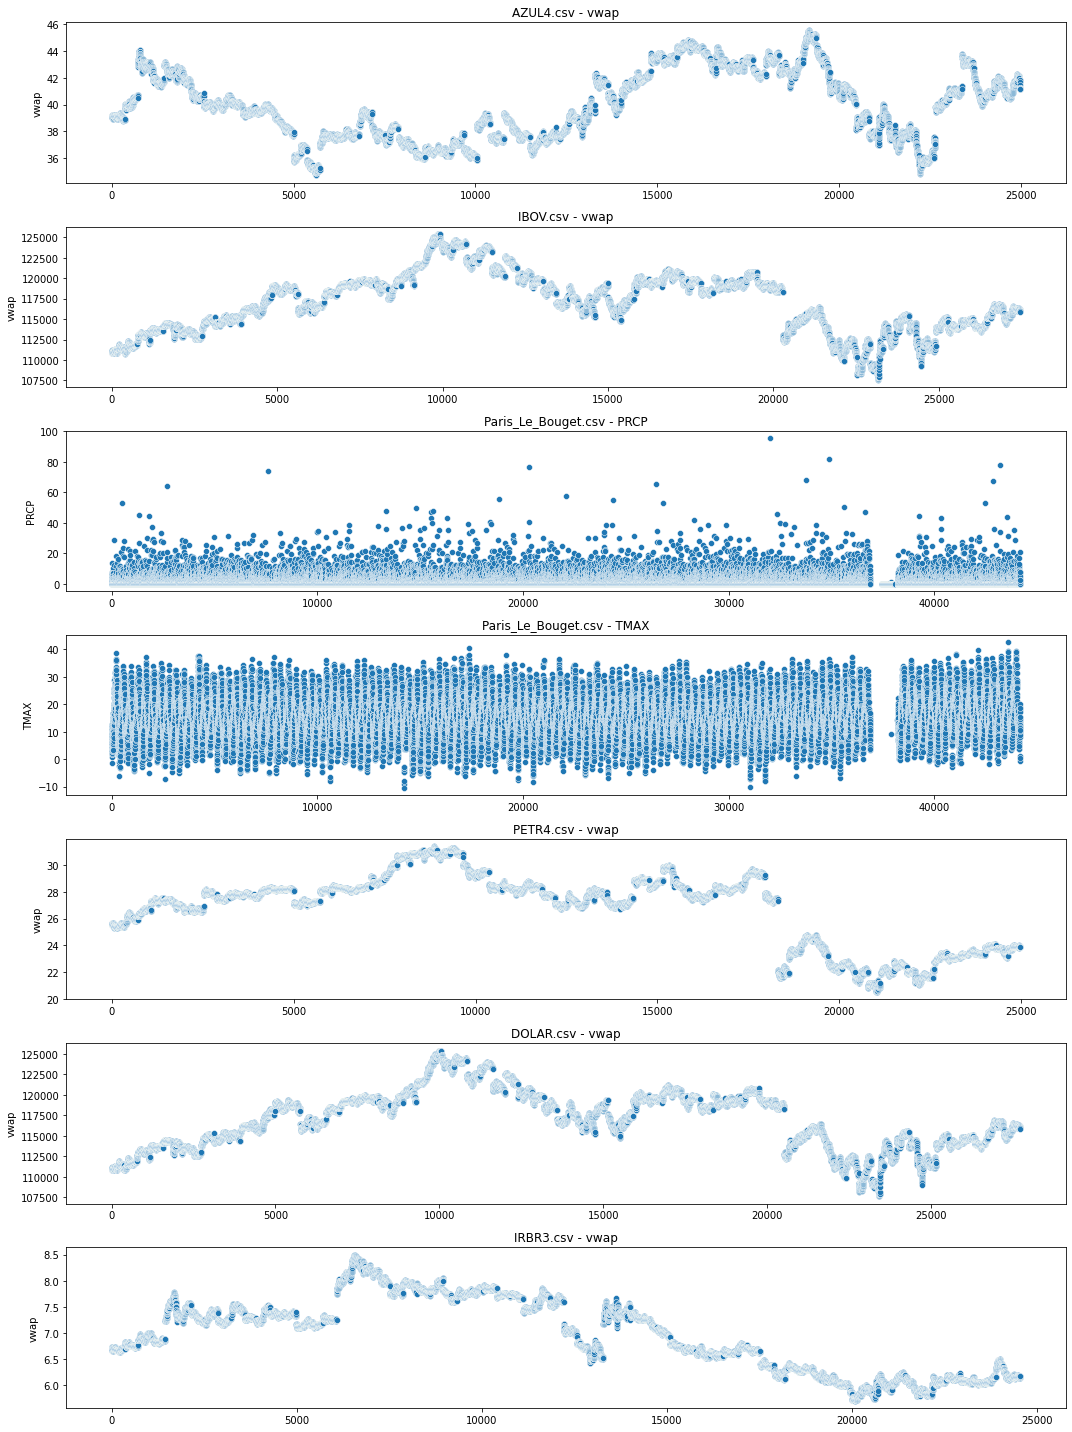

In [ ]:
fig, ax = plt.subplots(len(plot_param), figsize=(15,20))

for indice, param in enumerate(plot_param):
  #print(param[0], f' | Len: {len(dfs[param[0]])}')
  df_plot = dfs[param[0]]
  #x_colname = param[1]
  y_colname = param[2]

  sns.scatterplot(x = df_plot.index, 
              y = y_colname, 
              data = df_plot, 
              ls = '-',
              ax = ax[indice])
  ax[indice].set_title(param[0] + ' - ' + y_colname)
plt.tight_layout()

### Determinísticas ou estocásticas

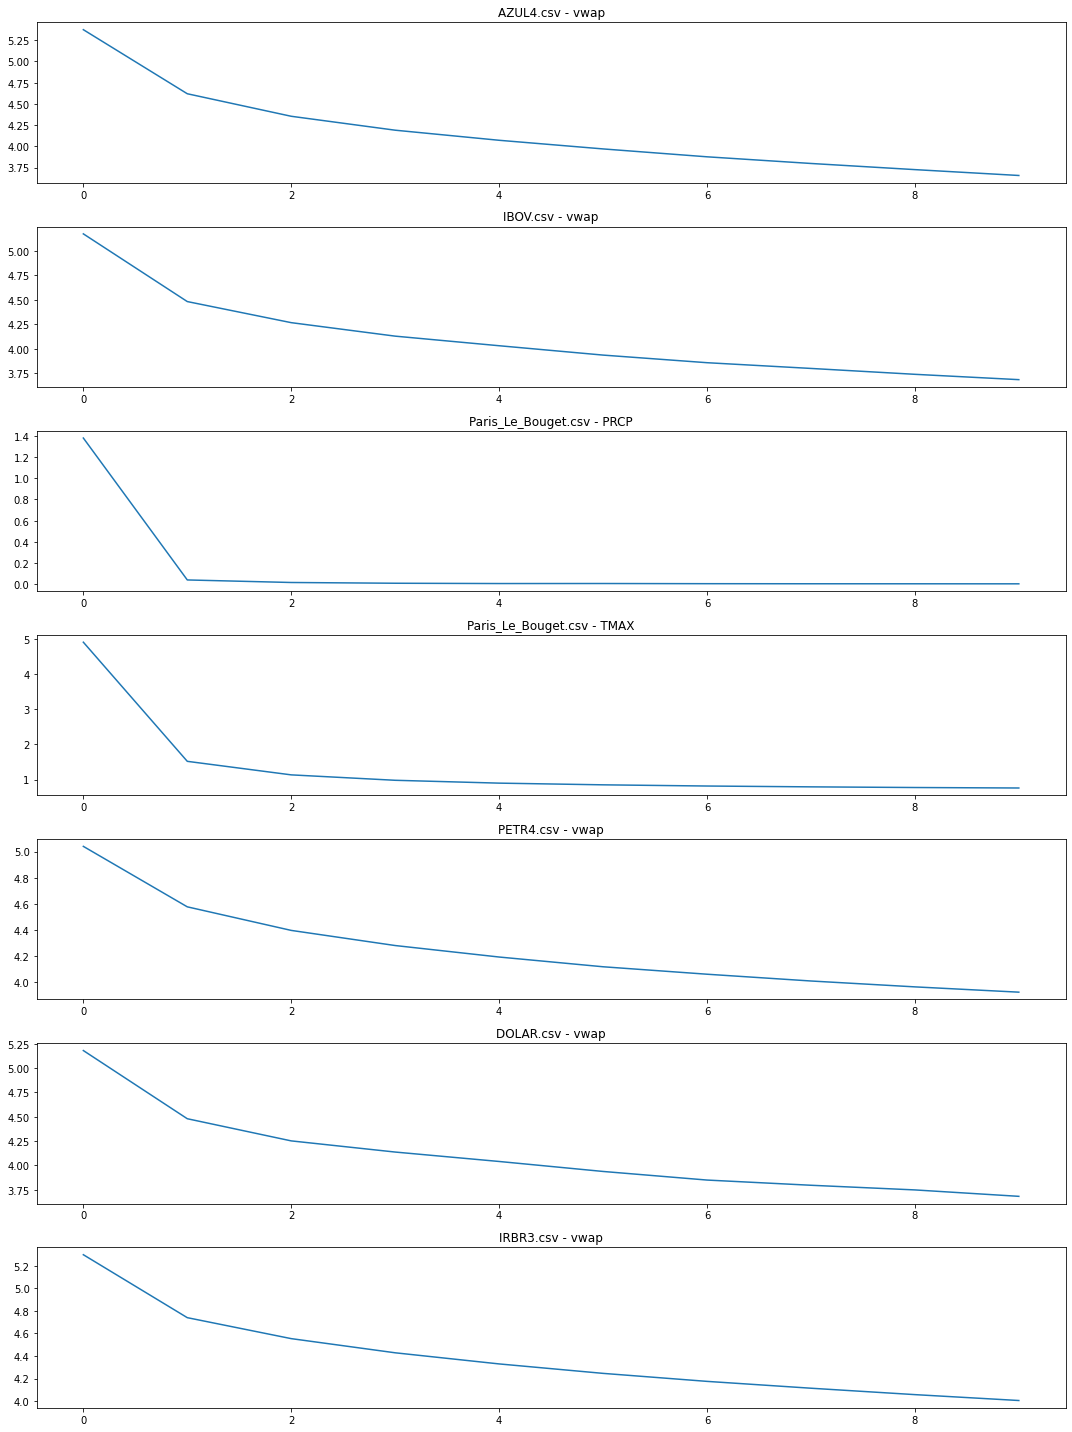

In [ ]:
fig, ax = plt.subplots(len(plot_param), figsize=(15,20))

for indice, param in enumerate(plot_param):
  #print(param[0])
  df_plot = dfs[param[0]]
  y_colname = param[2]

  ii = delay.dmi(df_plot[y_colname].fillna(0), maxtau=10, bins=50)
  ax[indice].plot(ii)
  ax[indice].set_title(param[0] + ' - ' + y_colname)

plt.tight_layout()

### Lineares ou Não-Lineares

### Estacionárias ou Não-Estacionárias

## Teste 

In [ ]:
y = np.linspace(0, 10, 1000)
x = np.sin(x)

# Compute autocorrelation and delayed mutual information.
lag = np.arange(50)
r = delay.acorr(x, maxtau=50)
i = delay.dmi(x, maxtau=50)

r_delay = np.argmax(r < 1.0 / np.e)
print(r'Autocorrelation time = %d' % r_delay)

plt.figure(1, figsize=(15,10))

plt.subplot(311)
plt.title(r'Henon map Series')
plt.plot(x)

plt.subplot(312)
plt.title(r'Delay estimation for Henon map')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i)

plt.subplot(313)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = 10')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-10], x[10:], '.')

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:], '.')

plt.show()
plt.tight_layout()

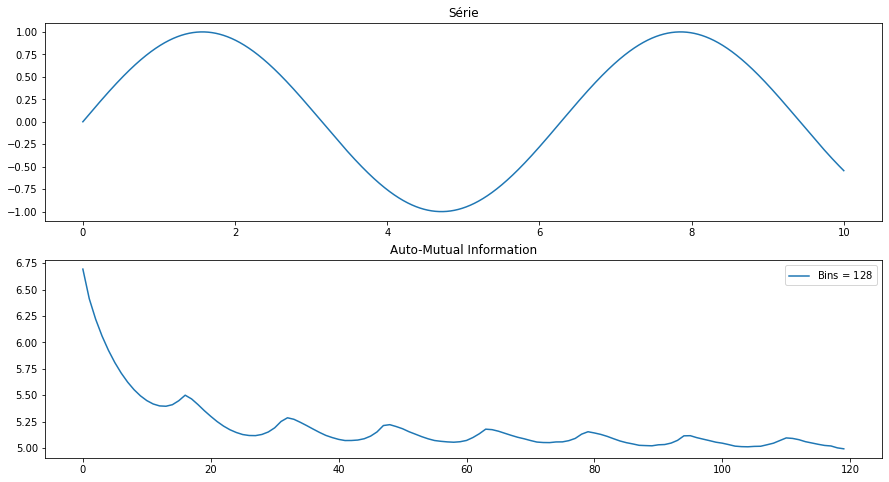

In [ ]:
fig, ax = plt.subplots(2, figsize=(15,8))

y = np.linspace(0, 10, 10000)
x = np.sin(y)
ax[0].plot(y, x)
ax[0].set_title('Série')

for bins in [ 128]:
# for bins in (2 ** np.arange(1, 8 + 1)):
    tempo = 120
    ii = delay.dmi(x, maxtau=tempo, bins=bins)
    ax[1].plot(ii, label=(r'Bins = $%d$' % bins))
    # sns.lineplot(x = np.array(range(tempo)), y = ii, ax=ax[1])
    ax[1].set_title('Auto-Mutual Information')

plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3125650344444.360840
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("tseriesChaos")
library("tseriesChaos")
x <- seq(0, 2*pi, length.out=50)
x

R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmptNukQt/downloaded_packages’
R[write to console]: 
R[write to console]: 



 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


In [ ]:
x = %R x

In [ ]:
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [ ]:
%%R
install.packages("tseriesChaos")
library("tseriesChaos")

In [ ]:
%%R
det_est <- function(series) {
    mt = mutual(series, lag.max=floor(length(series)/2), plot=F)
    return(mt)
}

det_est(1:100)

       0        1        2        3        4        5        6        7 
2.770249 2.355987 2.173634 2.103952 2.133757 2.277444 2.644537 2.351809 
       8        9       10       11       12       13       14       15 
2.135815 2.048501 2.061513 2.184831 2.509843 2.351507 2.097272 1.989880 
      16       17       18       19       20       21       22       23 
1.983714 2.083706 2.360432 2.356274 2.058184 1.927720 1.899445 1.972459 
      24       25       26       27       28       29       30       31 
2.193210 2.367734 2.018844 1.861590 1.807548 1.849001 2.004096 2.395432 
      32       33       34       35       36       37       38       39 
1.993532 1.813307 1.740804 1.764288 1.898942 2.254423 1.946344 1.741407 
      40       41       42       43       44       45       46       47 
1.654763 1.663528 1.779443 2.096707 1.899428 1.664567 1.560731 1.551486 
      48       49       50 
1.644325 1.914287 1.854134 
attr(,"class")
[1] "ami"


In [ ]:
%%R

x <- seq(0, 2*pi, length.out=50)
embedd(x, m=2, d=25)

           V1/0    V1/25
 [1,] 0.0000000 3.205707
 [2,] 0.1282283 3.333935
 [3,] 0.2564565 3.462163
 [4,] 0.3846848 3.590392
 [5,] 0.5129131 3.718620
 [6,] 0.6411414 3.846848
 [7,] 0.7693696 3.975076
 [8,] 0.8975979 4.103305
 [9,] 1.0258262 4.231533
[10,] 1.1540544 4.359761
[11,] 1.2822827 4.487990
[12,] 1.4105110 4.616218
[13,] 1.5387393 4.744446
[14,] 1.6669675 4.872674
[15,] 1.7951958 5.000903
[16,] 1.9234241 5.129131
[17,] 2.0516523 5.257359
[18,] 2.1798806 5.385587
[19,] 2.3081089 5.513816
[20,] 2.4363372 5.642044
[21,] 2.5645654 5.770272
[22,] 2.6927937 5.898500
[23,] 2.8210220 6.026729
[24,] 2.9492502 6.154957
[25,] 3.0774785 6.283185


In [ ]:
%%R

x <- seq(0, 2*pi, length.out=50)
df <- dist(embedd(x, m=2, d=25))
df

           1         2         3         4         5         6         7
2  0.1813422                                                            
3  0.3626843 0.1813422                                                  
4  0.5440265 0.3626843 0.1813422                                        
5  0.7253686 0.5440265 0.3626843 0.1813422                              
6  0.9067108 0.7253686 0.5440265 0.3626843 0.1813422                    
7  1.0880530 0.9067108 0.7253686 0.5440265 0.3626843 0.1813422          
8  1.2693951 1.0880530 0.9067108 0.7253686 0.5440265 0.3626843 0.1813422
9  1.4507373 1.2693951 1.0880530 0.9067108 0.7253686 0.5440265 0.3626843
10 1.6320794 1.4507373 1.2693951 1.0880530 0.9067108 0.7253686 0.5440265
11 1.8134216 1.6320794 1.4507373 1.2693951 1.0880530 0.9067108 0.7253686
12 1.9947638 1.8134216 1.6320794 1.4507373 1.2693951 1.0880530 0.9067108
13 2.1761059 1.9947638 1.8134216 1.6320794 1.4507373 1.2693951 1.0880530
14 2.3574481 2.1761059 1.9947638 1.8134216 1.632079

In [ ]:
df = %R df
df
np.quantile(df, 0.005)

0.1813421607411574

In [ ]:
%%R

x <- seq(0, 2*pi, length.out=50)
quantile(dist(embedd(x, m=2, d=25)), 0.05)

       5% 
0.1813422 
